In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install --upgrade category_encoders

#Importing Libraries

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from tabulate import tabulate  # dataframe to table
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, precision_score, f1_score, recall_score


#Loading Datasets

In [ ]:
#loading data set
df_train = pd.read_csv("/content/drive/MyDrive/mentor ml/Train (1).csv")

#Checking Null Value

In [ ]:
df_train.isna().sum()

ID                                     0
age                                    0
gender                                 0
education                              0
class                             105245
education_institute               196197
marital_status                         0
race                                   0
is_hispanic                            0
employment_commitment                  0
unemployment_reason               202979
employment_stat                        0
wage_per_hour                          0
is_labor_union                    189420
working_week_per_year                  0
industry_code                          0
industry_code_main                     0
occupation_code                        0
occupation_code_main              105694
total_employed                         0
household_stat                         0
household_summary                      0
under_18_family                   151654
veterans_admin_questionnaire      207415
vet_benefit     

#Removing & Replacing null values and columns

In [ ]:
df_train1=df_train.dropna(how='all')

In [ ]:
df_train1=df_train1.drop(['ID','education_institute','class','unemployment_reason','occupation_code_main','is_labor_union','under_18_family','veterans_admin_questionnaire','residence_1_year_ago','old_residence_reg','old_residence_state','migration_prev_sunbelt'], axis=1)

In [ ]:
df_train1=df_train1.fillna(method='pad')

In [ ]:
df_train1=df_train1.fillna(method='bfill')

In [ ]:
df_train1.isna().sum().sum()

0

#Replacing Garbage Value

In [ ]:
df_train1['migration_code_change_in_msa']=df_train1['migration_code_change_in_msa'].replace({'?':'Not identifiable'},inplace=True)

In [ ]:
df_train1['migration_code_move_within_reg']=df_train1['migration_code_move_within_reg'].replace({'?':'unchanged'},inplace=True)

In [ ]:
df_train1['migration_code_change_in_reg']=df_train1['migration_code_change_in_reg'].replace({'?':'unchanged'},inplace=True)

In [ ]:
df_train1['country_of_birth_own']=df_train1['country_of_birth_own'].replace({'?':'unknown'},inplace=True)

In [ ]:
df_train1['country_of_birth_father']=df_train1['country_of_birth_father'].replace({'?':'unknown'},inplace=True)

In [ ]:
df_train1['country_of_birth_mother']=df_train1['country_of_birth_mother'].replace({'?':'unknown'},inplace=True)

#Checking Outliers & Dealing with Outliers

In [ ]:
df_train1.describe()[['age','wage_per_hour','working_week_per_year','gains','losses']]

,age,wage_per_hour,working_week_per_year,gains,losses
count,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000
mean,34.518728,55.433487,23.158850,435.926887,36.881737
std,22.306738,276.757327,24.397963,4696.359500,270.383302
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.000000,0.000000,0.000000
50%,33.000000,0.000000,8.000000,0.000000,0.000000
75%,50.000000,0.000000,52.000000,0.000000,0.000000
max,90.000000,9999.000000,52.000000,99999.000000,4608.000000


<Axes: xlabel='gender', ylabel='age'>

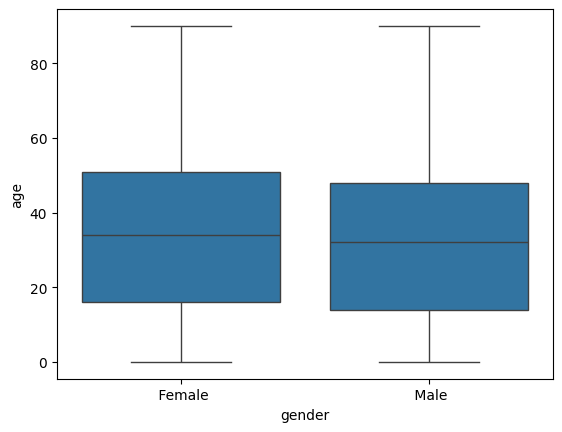

In [ ]:
sns.boxplot(x='gender',y='age',data=df_train1)

<Axes: xlabel='gains', ylabel='Density'>

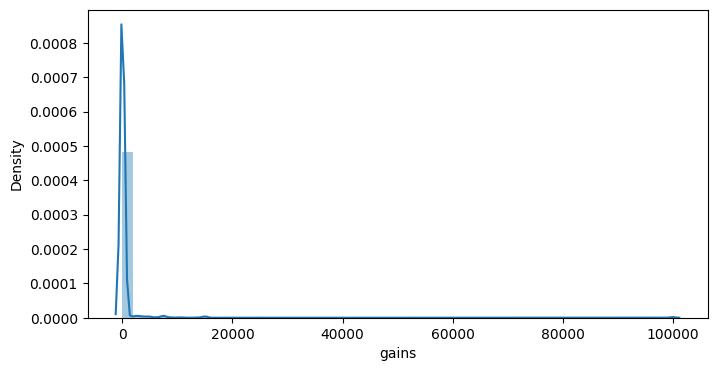

In [ ]:
sns.distplot(df_train1['gains'])

<Axes: xlabel='wage_per_hour', ylabel='Density'>

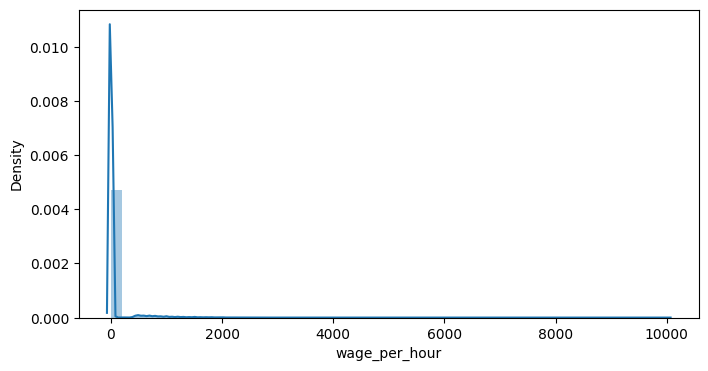

In [ ]:
sns.distplot(df_train1['wage_per_hour'])

<Axes: xlabel='losses', ylabel='Density'>

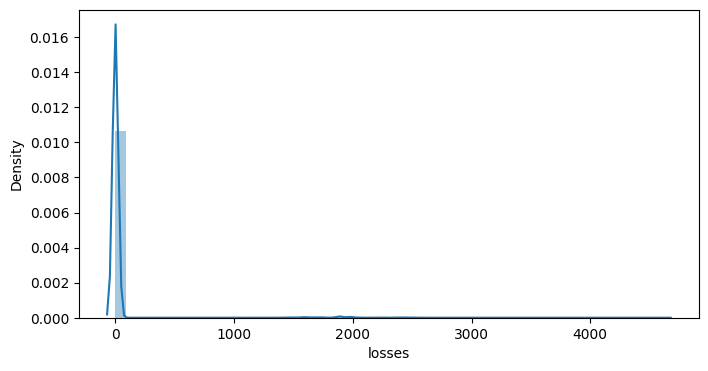

In [ ]:
sns.distplot(df_train1['losses'])

<Axes: xlabel='working_week_per_year', ylabel='Density'>

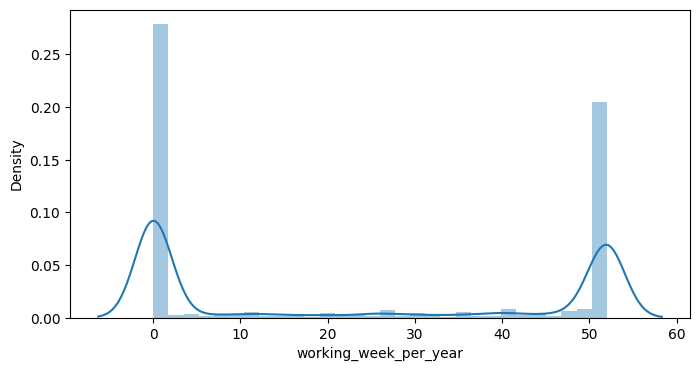

In [ ]:
sns.distplot(df_train1['working_week_per_year'])

In [ ]:
#finding with IQR
def find_outliers_IQR(df_train1):
  q1=df_train1.quantile(0.25)

  q3=df_train1.quantile(0.75)

  IQR=q3-q1

  outliers = df_train1[((df_train1<(q1-1.5*IQR)) | (df_train1>(q3+1.5*IQR)))]

  return outliers


In [ ]:
outliers = find_outliers_IQR(df_train1[['wage_per_hour','losses','gains']])


print('number of outliers:'+ str(len(outliers)))

print('max outlier value:'+ str(outliers.max()))

print('min outlier value:'+ str(outliers.min()))
outliers

number of outliers:209499
max outlier value:wage_per_hour     9999.0
losses            4608.0
gains            99999.0
dtype: float64
min outlier value:wage_per_hour     70.0
losses           155.0
gains            114.0
dtype: float64


,wage_per_hour,losses,gains
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,500.0,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
209494,NaN,NaN,NaN
209495,NaN,NaN,NaN
209496,NaN,NaN,NaN
209497,700.0,NaN,NaN


In [ ]:
#removing outliers
def impute_outliers_IQR(df_train1):

   q1=df_train1.quantile(0.25)

   q3=df_train1.quantile(0.75)

   IQR=q3-q1

   upper = df_train1[~(df_train1>(q3+1.5*IQR))].max()

   lower = df_train1[~(df_train1<(q1-1.5*IQR))].min()

   df_train1 = np.where(df_train1 > upper,

      df_train1.mean(),

       np.where(

           df_train1 < lower,

           df_train1.mean(),

           df_train1

           )

       )

   return df_train1

In [ ]:
df_train1['wage_per_hour'] = impute_outliers_IQR(df_train1['wage_per_hour'])
df_train1['gains'] = impute_outliers_IQR(df_train1['gains'])
df_train1['losses'] = impute_outliers_IQR(df_train1['losses'])

#Encoding categorical Variables

In [ ]:
#label encoding
df_train1[['age',
 'gender',
 'marital_status',
 'race',
 'is_hispanic',
 'employment_commitment',
 'employment_stat',
 'wage_per_hour',
 'working_week_per_year',
 'industry_code',
 'industry_code_main',
 'occupation_code',
 'total_employed',
 'household_stat',
 'household_summary',
 'vet_benefit',
 'tax_status',
 'gains',
 'losses',
 'stocks_status',
 'citizenship',
 'mig_year',
 'country_of_birth_own',
 'country_of_birth_father',
 'country_of_birth_mother',
 'migration_code_change_in_msa',
 'migration_code_move_within_reg',
 'migration_code_change_in_reg',
 'importance_of_record',
 'income_above_limit']] = df_train1[['age',
 'gender',
 'marital_status',
 'race',
 'is_hispanic',
 'employment_commitment',
 'employment_stat',
 'wage_per_hour',
 'working_week_per_year',
 'industry_code',
 'industry_code_main',
 'occupation_code',
 'total_employed',
 'household_stat',
 'household_summary',
 'vet_benefit',
 'tax_status',
 'gains',
 'losses',
 'stocks_status',
 'citizenship',
 'mig_year',
 'country_of_birth_own',
 'country_of_birth_father',
 'country_of_birth_mother',
 'migration_code_change_in_msa',
 'migration_code_move_within_reg',
 'migration_code_change_in_reg',
 'importance_of_record',
 'income_above_limit']].apply(LabelEncoder().fit_transform)

In [ ]:
#ORIDINAL ENCODING
encoder = OrdinalEncoder()
df_train1['education'] = encoder.fit_transform(df_train1[['education']])
df_train1

,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,...,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_code_move_within_reg,migration_code_change_in_reg,importance_of_record,income_above_limit
0,79,0,12.0,6,4,0,2,0,0,52,...,4,1,0,0,0,0,0,0,55690,1
1,65,0,12.0,6,4,0,0,0,0,0,...,4,0,0,0,0,0,0,0,76194,1
2,21,1,2.0,4,2,0,0,0,1,15,...,4,0,0,0,0,0,0,0,51881,1
3,2,0,10.0,4,1,0,0,0,0,0,...,4,0,0,0,0,0,0,0,39247,1
4,70,1,12.0,2,4,0,2,0,0,0,...,4,1,0,0,0,0,0,0,47108,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209494,16,0,5.0,4,4,0,2,0,0,0,...,4,1,0,0,0,0,0,0,70886,1
209495,78,1,9.0,2,4,0,2,0,0,0,...,4,1,0,0,0,0,0,0,24674,1
209496,8,0,10.0,4,4,0,0,0,0,0,...,4,1,0,0,0,0,0,0,15916,1
209497,26,0,16.0,2,4,0,0,0,1,52,...,4,0,0,0,0,0,0,0,94973,1


#Feature Selection

In [ ]:
features=df_train1[['age',
 'gender',
 'marital_status',
 'race',
 'is_hispanic',
 'employment_commitment',
 'employment_stat',
 'wage_per_hour',
 'working_week_per_year',
 'industry_code',
 'industry_code_main',
 'occupation_code',
 'total_employed',
 'household_stat',
 'household_summary',
 'vet_benefit',
 'tax_status',
 'gains',
 'losses',
 'stocks_status',
 'citizenship',
 'mig_year',
 'country_of_birth_own',
 'country_of_birth_father',
 'country_of_birth_mother',
 'migration_code_change_in_msa',
 'migration_code_move_within_reg',
 'migration_code_change_in_reg',
 'importance_of_record']]

target=df_train1[['income_above_limit']]
features_scores=mutual_info_classif(features,target,random_state=0)
features_scores

array([3.97575883e-02, 3.28708066e-02, 3.87721777e-02, 3.61006935e-02,
       3.32220381e-03, 5.12053938e-03, 2.74894473e-03, 1.20865427e-03,
       4.93756413e-02, 2.09126233e-02, 3.13963276e-02, 5.32244782e-03,
       2.28115024e-02, 3.93037426e-02, 4.09001477e-02, 5.08302931e-02,
       4.40566382e-02, 1.30203416e-02, 6.33554015e-03, 1.89663718e-02,
       3.59859408e-02, 2.28164578e-02, 3.94620618e-05, 1.08992232e-04,
       2.19882500e-05, 1.55609290e-04, 0.00000000e+00, 0.00000000e+00,
       1.02660938e-02])

In [ ]:
df_train1=df_train1.drop(['total_employed','stocks_status','country_of_birth_father',
 'country_of_birth_mother',
 'migration_code_change_in_msa',
 'migration_code_move_within_reg',
 'migration_code_change_in_reg'], axis=1)

#Solving class Imbalance Problem


1    196501
0     12998
Name: income_above_limit, dtype: int64


<Axes: xlabel='income_above_limit', ylabel='count'>

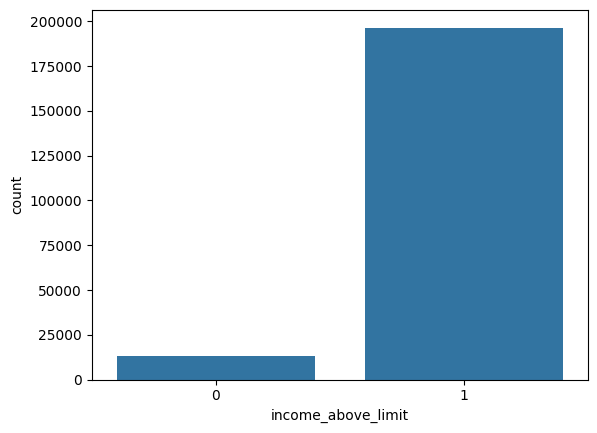

In [ ]:
df_train1['income_above_limit'].value_counts()
print(df_train1['income_above_limit'].value_counts())

sns.countplot(data=df_train1,x='income_above_limit')

In [ ]:
import plotly.express as px
piechart = df_train1['income_above_limit'].value_counts()
transactions = piechart.index
quantity = piechart.values

figure = px.pie(df_train1,
             values=quantity,
             names=transactions,hole = 0.5,
             title="income_above_limit")
figure.show()

In [ ]:
X_train = df_train1.iloc[:, :-1]  # Selecting all columns except the last one as independent variables
y_train = df_train1.iloc[:, -1]    # Selecting the last column as the dependent variable

# For testing data
X_test = df_train1.iloc[:, :-1]    # Selecting all columns except the last one as independent variables
y_test = df_train1.iloc[:, -1]
df_train, df_test = train_test_split(df_train1, test_size=0.20, random_state=0)
print('Size of train dataframe: ', df_train.shape[0])
print('Size of test dataframe: ', df_test.shape[0])


Size of train dataframe:  167599
Size of test dataframe:  41900


In [ ]:
#random Undersampling
rus = RandomUnderSampler(sampling_strategy=1)
X_res, y_res = rus.fit_resample(X_train, y_train)


In [ ]:
piechart = y_res.value_counts()
transactions = piechart.index
quantity = piechart.values

figure = px.pie(y_res,
             values=quantity,
             names=transactions,hole = 0.5,
             title="income_above_limit")
figure.show()

#Model Selection & Performance Evaluation

In [ ]:
#Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier on the resampled training data
rf_classifier.fit(X_res, y_res)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

Accuracy: 0.8467486718313691
Precision: 1.0
ROC AUC: 0.9183057592582227
              precision    recall  f1-score   support

           0       0.29      1.00      0.45     12998
           1       1.00      0.84      0.91    196501

    accuracy                           0.85    209499
   macro avg       0.64      0.92      0.68    209499
weighted avg       0.96      0.85      0.88    209499



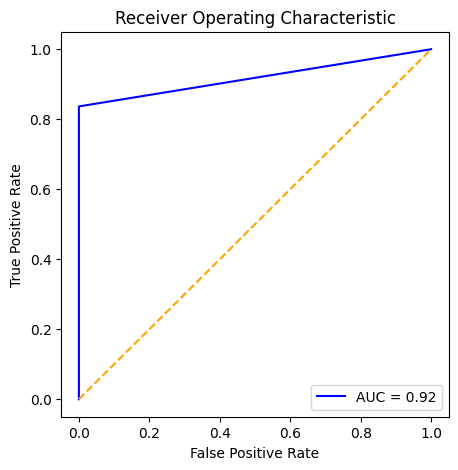

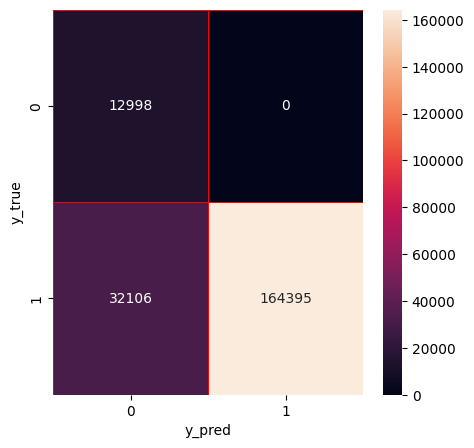

In [ ]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
y_true=y_test


print("Accuracy:", accuracy)
print("Precision:", precision)
print("ROC AUC:", roc_auc)

print(classification_report(y_test, y_pred))
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,color='blue',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--', color='orange')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#confusion matrix
cm=confusion_matrix(y_true,y_pred)
cm
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy: 0.7469295796161318
Precision: 0.9853465480499273
ROC AUC: 0.7872857456088873
              precision    recall  f1-score   support

           0       0.18      0.83      0.29     12998
           1       0.99      0.74      0.85    196501

    accuracy                           0.75    209499
   macro avg       0.58      0.79      0.57    209499
weighted avg       0.94      0.75      0.81    209499



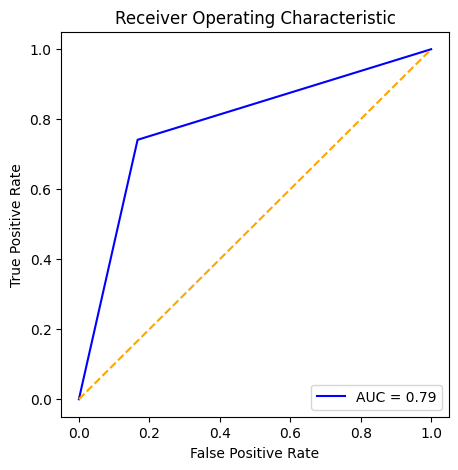

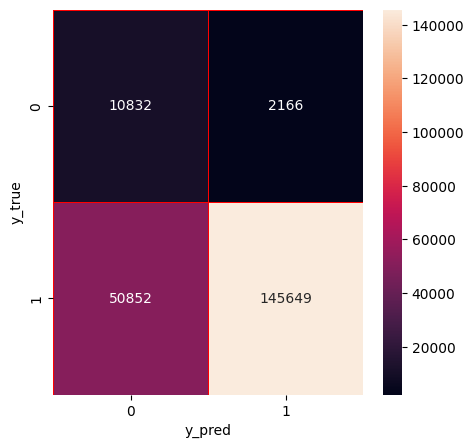

In [ ]:
lr_classifier=LogisticRegression()
lr_classifier.fit(X_res, y_res)

# Make predictions on the test data
y_pred = lr_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("ROC AUC:", roc_auc)
print(classification_report(y_test, y_pred))
# Plot ROC curve

fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,color='blue',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--', color='orange')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#confusion matrix
cm=confusion_matrix(y_true,y_pred)
cm
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy: 0.656566379791789
Precision: 0.9711454077772734
ROC AUC: 0.6799145018087751
              precision    recall  f1-score   support

           0       0.12      0.71      0.20     12998
           1       0.97      0.65      0.78    196501

    accuracy                           0.66    209499
   macro avg       0.54      0.68      0.49    209499
weighted avg       0.92      0.66      0.75    209499



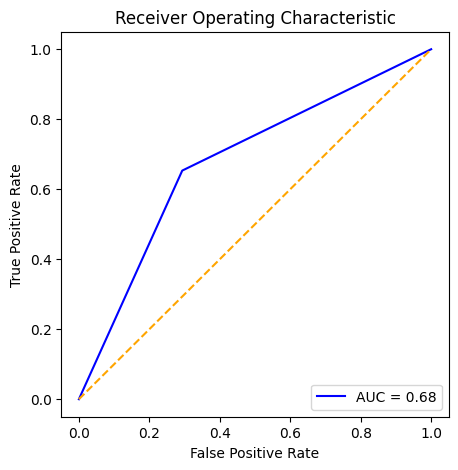

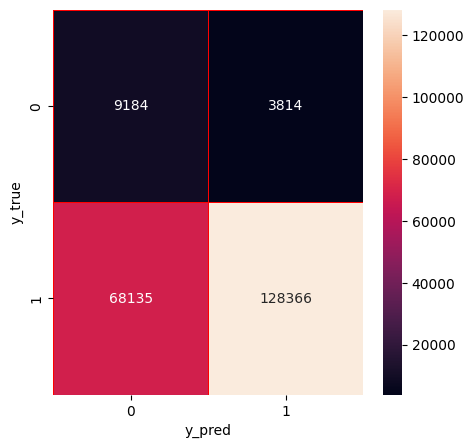

In [ ]:
nb_classifier=MultinomialNB()
nb_classifier.fit(X_res, y_res)

# Make predictions on the test data
y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("ROC AUC:", roc_auc)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,color='blue',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--', color='orange')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#confusion matrix
cm=confusion_matrix(y_true,y_pred)
cm
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()